# In this notebook, I have analyzed cats and dogs images using a Convolution Neural Network(CNN) model. I have used 2000 images for  training and 1000 images for tests. An ImageDataGenerator is used to generate images. Without it the model was overfitting the training data.

### Author: Abhisek Saha
#### Data and idea credit: https://medium.com/analytics-vidhya/transfer-learning-using-inception-v3-for-image-classification-86700411251b

In [38]:
# Getting Dependencies

import numpy as np
import matplotlib.pyplot as plt
import os

from keras.models import Model, Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image

In [5]:
# Getting the File paths

base_dir = "/home/abhisek/python_exam/python_practice/Data_science_practice/TransferLearning/cats_and_dogs_filtered/"
train_dir = os.path.join(base_dir, 'train/')
validation_dir = os.path.join(base_dir, 'validation/')


In [12]:
# Creating the model

model = Sequential([
    # Adding the first convolution layer
    Conv2D(32,(3,3), input_shape=(155,155,3), activation='relu'),
    MaxPooling2D(2,2),
    
    # Adding the Second convolution layer
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    # Adding the third convolution layer
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    # Adding the first convolution layer
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    # Flatten the output
    Flatten(),
    
    # 512 hidden Dense Neuron layers 
    Dense(512, activation='relu'),
    
    # Final 1 neuron output layer
    Dense(1, activation='sigmoid')
    ])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 153, 153, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 76, 76, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 35, 35, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [14]:
# Compiling the model
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [15]:
# Create ImageDataGenerator Instance and flow images to generate sets of images

# train_generator = ImageDataGenerator(rescale = 1.0/255.,
#                                     width_shift_range=0.2,
#                                     height_shift_range=0.2,
#                                     rotation_range=40,
#                                     horizontal_flip=True,
#                                     shear_range=0.2,
#                                     zoom_range=0.2,
#                                     fill_mode='nearest')

train_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

In [16]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (155,155),
                                                    class_mode = 'binary', 
                                                    batch_size = 20)

test_generator = test_datagen.flow_from_directory(validation_dir,
                                                 target_size = (155,155),
                                                 class_mode = 'binary',
                                                 batch_size = 20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [17]:
# Fitting the images to the model

history = model.fit_generator(train_generator,
                             steps_per_epoch = 100, # Total_train_images = steps_per_epoch * batch_size
                             epochs = 30,
                             validation_data = test_generator,
                             validation_steps = 50, # total_test_images = validation_seps * batch_size
                             verbose=2)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 - 126s - loss: 0.7041 - accuracy: 0.5170 - val_loss: 0.6809 - val_accuracy: 0.5930 - 126s/epoch - 1s/step
Epoch 2/30
100/100 - 113s - loss: 0.6758 - accuracy: 0.5950 - val_loss: 0.6667 - val_accuracy: 0.5900 - 113s/epoch - 1s/step
Epoch 3/30
100/100 - 114s - loss: 0.6409 - accuracy: 0.6375 - val_loss: 0.6449 - val_accuracy: 0.6250 - 114s/epoch - 1s/step
Epoch 4/30
100/100 - 113s - loss: 0.6070 - accuracy: 0.6630 - val_loss: 0.6159 - val_accuracy: 0.6670 - 113s/epoch - 1s/step
Epoch 5/30
100/100 - 102s - loss: 0.5694 - accuracy: 0.7135 - val_loss: 0.6137 - val_accuracy: 0.6750 - 102s/epoch - 1s/step
Epoch 6/30
100/100 - 104s - loss: 0.4985 - accuracy: 0.7535 - val_loss: 0.6286 - val_accuracy: 0.6810 - 104s/epoch - 1s/step
Epoch 7/30
100/100 - 103s - loss: 0.4527 - accuracy: 0.7825 - val_loss: 0.6673 - val_accuracy: 0.6190 - 103s/epoch - 1s/step
Epoch 8/30
100/100 - 103s - loss: 0.3578 - accuracy: 0.8310 - val_loss: 0.6781 - val_accuracy: 0.7030 - 103s/epoch - 1s/step


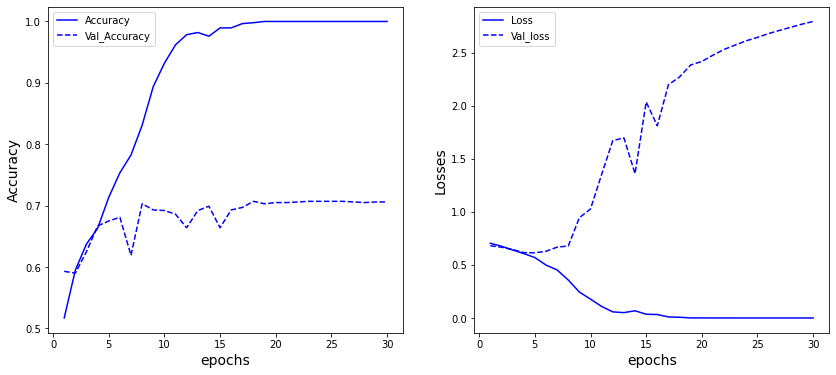

In [216]:
# Visualizing Accuracy and loss

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = np.arange(1,len(acc)+1)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b', label='Accuracy')
plt.plot(epochs, val_acc, 'b--', label='Val_Accuracy')
plt.xlabel("epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, val_loss, 'b--', label='Val_loss')
plt.xlabel("epochs", fontsize=14)
plt.ylabel("Losses", fontsize=14)

plt.legend()
plt.show()

## This is a clear case of overitting. The train accuracy reached 1 but validation accuracy is around 0.7. Also the validation loss is increasing.

# Adding Augmented images

In [22]:
# Create ImageDataGenerator Instance and flow images to generate sets of images

train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=40,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest')

#train_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

In [23]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (155,155),
                                                    class_mode = 'binary', 
                                                    batch_size = 20)

test_generator = test_datagen.flow_from_directory(validation_dir,
                                                 target_size = (155,155),
                                                 class_mode = 'binary',
                                                 batch_size = 20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [30]:
# Creating the model

model_aug = Sequential([
    # Adding the first convolution layer
    Conv2D(32,(3,3), input_shape=(155,155,3), activation='relu'),
    MaxPooling2D(2,2),
    
    # Adding the Second convolution layer
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    # Adding the third convolution layer
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    # Adding the first convolution layer
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    # Implimenting Dropout layer
    Dropout(0.5),
    
    # Flatten the output
    Flatten(),
    
    # 512 hidden Dense Neuron layers 
    Dense(512, activation='relu'),
    
    # Final 1 neuron output layer
    Dense(1, activation='sigmoid')
    ])

In [31]:
model_aug.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 153, 153, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 76, 76, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 74, 74, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 35, 35, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [34]:
model_aug.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [35]:
# Callback function

class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.94):
            print("\nReached 94% accuracy so cancelling training!")
            self.model.stop_training = True

In [36]:
# Fitting the images to the model

callback = myCallback()
history_aug = model_aug.fit_generator(train_generator,
                             steps_per_epoch = 100, # Total_train_images = steps_per_epoch * batch_size
                             epochs = 50,
                             validation_data = test_generator,
                             validation_steps = 50, # total_test_images = validation_seps * batch_size
                             verbose = 2,
                             callbacks= [callback])

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
100/100 - 185s - loss: 0.6942 - accuracy: 0.5150 - val_loss: 0.6902 - val_accuracy: 0.5400 - 185s/epoch - 2s/step
Epoch 2/50
100/100 - 112s - loss: 0.6927 - accuracy: 0.5170 - val_loss: 0.6915 - val_accuracy: 0.5020 - 112s/epoch - 1s/step
Epoch 3/50
100/100 - 111s - loss: 0.6880 - accuracy: 0.5545 - val_loss: 0.6699 - val_accuracy: 0.5890 - 111s/epoch - 1s/step
Epoch 4/50
100/100 - 108s - loss: 0.6736 - accuracy: 0.5845 - val_loss: 0.6475 - val_accuracy: 0.6470 - 108s/epoch - 1s/step
Epoch 5/50
100/100 - 109s - loss: 0.6802 - accuracy: 0.5615 - val_loss: 0.6538 - val_accuracy: 0.6050 - 109s/epoch - 1s/step
Epoch 6/50
100/100 - 113s - loss: 0.6525 - accuracy: 0.5995 - val_loss: 0.6081 - val_accuracy: 0.6570 - 113s/epoch - 1s/step
Epoch 7/50
100/100 - 111s - loss: 0.6612 - accuracy: 0.6035 - val_loss: 0.6101 - val_accuracy: 0.6650 - 111s/epoch - 1s/step
Epoch 8/50
100/100 - 114s - loss: 0.6433 - accuracy: 0.6305 - val_loss: 0.6186 - val_accuracy: 0.6540 - 114s/epoch - 1s/step


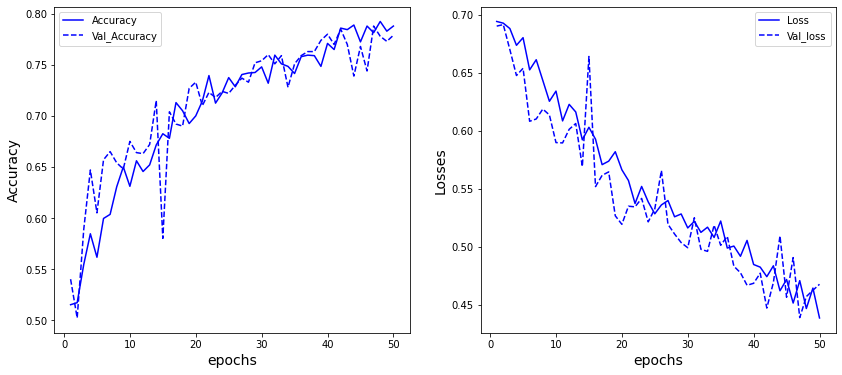

In [215]:
# Visualizing Accuracy and loss after Augmentation and adding a dropout layer in the model

acc = history_aug.history['accuracy']
loss = history_aug.history['loss']
val_acc = history_aug.history['val_accuracy']
val_loss = history_aug.history['val_loss']

epochs = np.arange(1,len(acc)+1)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b', label='Accuracy')
plt.plot(epochs, val_acc, 'b--', label='Val_Accuracy')
plt.xlabel("epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, val_loss, 'b--', label='Val_loss')
plt.xlabel("epochs", fontsize=14)
plt.ylabel("Losses", fontsize=14)

plt.legend()
plt.show()

## 1. This is a much better situation than the privious one. Although the we rech only 80% accuracy, but now there is no overfitting.

## 2. Notice that the lines in both of these plots have not saturated. If we increase the number of epochs, we can get better accuracy. The increase in the number of training imge can also improve the accuracy as we have only used 3000 images for training and validation.

## 3. One can also use transfer learnings to get better results.

# Validation Using Train and Validation Images

In [136]:
# Testing with train cats and dogs images and saving the predictions in lists
path = "train/"
cat_path = os.path.join(path, 'cats/')
dog_path = os.path.join(path, 'dogs/')

train_cat_predictions = []
train_dog_predictions = []

for i in range(0,499):
    fn = 'cat.'+str(i)+'.jpg'
    file_name = os.path.join(cat_path,fn)
    img = image.load_img(file_name, target_size=(155,155))
    x = image.img_to_array(img)/255.
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model_aug.predict(images, batch_size=10)
    #print(classes[0])
    if(classes[0]>0.5):
        #print(fn + " is a dog")
        train_cat_predictions.append("dog")
    else:
        #print(fn + " is a cat")
        train_cat_predictions.append("cat")
    
    fn = 'dog.'+str(i)+'.jpg'
    file_name = os.path.join(dog_path,fn)
    img = image.load_img(file_name, target_size=(155,155))
    x = image.img_to_array(img)/255.
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model_aug.predict(images, batch_size=10)
    #print(classes[0])
    if(classes[0]>0.5):
        #print(fn + " is a dog")
        train_dog_predictions.append("dog")
    else:
        #print(fn + " is a cat")
        train_dog_predictions.append("cat")



In [137]:
# Testing with validation cats and dogs images and saving the predictions in lists
path = "validation/"
cat_path = os.path.join(path, 'cats/')
dog_path = os.path.join(path, 'dogs/')

val_cat_predictions = []
val_dog_predictions = []

for i in range(0,499):
    fn = 'cat.'+str(2000+i)+'.jpg'
    file_name = os.path.join(cat_path,fn)
    img = image.load_img(file_name, target_size=(155,155))
    x = image.img_to_array(img)/255.
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model_aug.predict(images, batch_size=10)
    #print(classes[0])
    if(classes[0]>0.5):
        #print(fn + " is a dog")
        val_cat_predictions.append("dog")
    else:
        #print(fn + " is a cat")
        val_cat_predictions.append("cat")
    
    fn = 'dog.'+str(2000+i)+'.jpg'
    file_name = os.path.join(dog_path,fn)
    img = image.load_img(file_name, target_size=(155,155))
    x = image.img_to_array(img)/255.
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model_aug.predict(images, batch_size=10)
    #print(classes[0])
    if(classes[0]>0.5):
        #print(fn + " is a dog")
        val_dog_predictions.append("dog")
    else:
        #print(fn + " is a cat")
        val_dog_predictions.append("cat")



In [193]:
# Calculating prediction percentages
train_right_cat = train_cat_predictions.count("cat")/500
train_wrong_dog = train_cat_predictions.count("dog")/500

train_right_dog = train_dog_predictions.count("dog")/500
train_wrong_cat = train_dog_predictions.count("cat")/500

val_right_cat = val_cat_predictions.count("cat")/500
val_wrong_dog = val_cat_predictions.count("dog")/500

val_right_dog = val_dog_predictions.count("dog")/500
val_wrong_cat = val_dog_predictions.count("cat")/500

percentages = [train_right_cat, train_wrong_dog, train_wrong_cat, train_right_dog, 
              val_right_cat, val_wrong_dog, val_wrong_cat, val_right_dog]
percentages

[0.734, 0.264, 0.086, 0.912, 0.672, 0.326, 0.116, 0.882]

/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

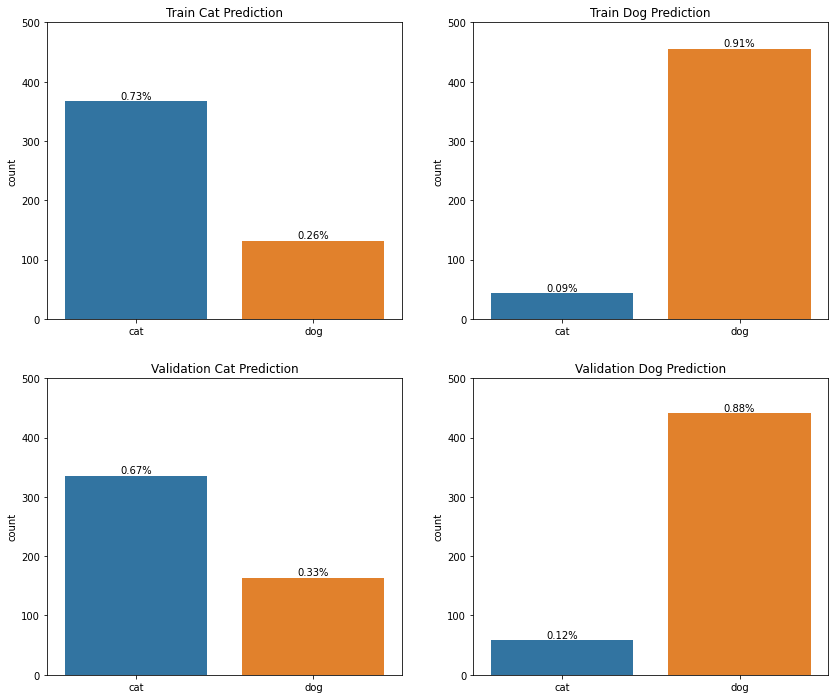

In [213]:
# Plotting the number of times the model gives right and wrong predictions
import seaborn as sns

titles = ["Train Cat Prediction", "Train Dog Prediction", "Validation Cat Prediction", "Validation Dog Prediction"]
prediction_data = [train_cat_predictions, train_dog_predictions, val_cat_predictions, val_dog_predictions]
k=0
plt.figure(figsize=(14,12))

for figs in range(1,5):
    plt.subplot(2,2,figs)
    plt.title(titles[figs-1])
    plt.ylim(0,500)
    axis_name = 'ax'+str(figs)
    axis_name = sns.countplot(prediction_data[figs-1], order=['cat','dog'])
    patches = axis_name.patches
    for i in range(len(patches)):
        x = patches[i].get_x() + patches[i].get_width()/2
        y = patches[i].get_height()+4.0
        axis_name.annotate('{:.2f}%'.format(percentages[k]), (x, y), ha='center')
        k+=1



plt.show()